<h1>CNN on Real Images - Malaria Dataset</h1>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/cell_images.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp')      #Extracts the files into the /tmp folder
zip_ref.close()

In [4]:
os.listdir('/tmp/cell_images')

['train', 'test']

Reading the Data

In [6]:
# importing the libaraires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread   # Read an image from a file into an array.

In [7]:
# set the location path of the directory where the images are stored

data_dir = '/tmp/cell_images'
train_path = data_dir + '/train/'
test_path = data_dir + '/test/'

In [10]:
print("Path where the training images are stored: ", train_path)
print("Path where the test images are stored: ", test_path)
print("Labels in the training images are: ", os.listdir(train_path))

Path where the training images are stored:  /tmp/cell_images/train/
Path where the test images are stored:  /tmp/cell_images/test/
Labels in the training images are:  ['uninfected', 'parasitized']


**So, we are going to build a model that just based off the image of a cell. Can it predict whether or not it's infected or not**

In [30]:
# to see the first image inside parasitized label/folder

print(os.listdir(train_path + 'parasitized')[0])
para_cell = train_path + 'parasitized/C39P4thinF_original_IMG_20150622_105102_cell_84.png'

C39P4thinF_original_IMG_20150622_105102_cell_84.png


In [31]:
print(imread(para_cell))     # converts image to array/matrix format
print("Shape of the first image: ",imread(para_cell).shape)

[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]
Shape of the first image:  (130, 157, 3)


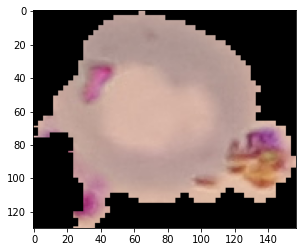

In [32]:
# view the image

plt.imshow(imread(para_cell))     # we could clearly see this is an infected cell

C54P15thinF_IMG_20150728_105949_cell_228.png
Shape of the selected image:  (118, 121, 3)


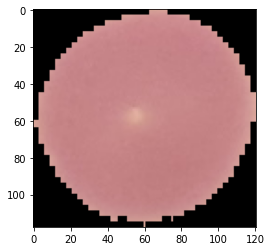

In [28]:
# see the image of uninfected cell to get an idea

print(os.listdir(train_path + 'uninfected/')[0])
uninfected_cell = train_path + 'uninfected/C54P15thinF_IMG_20150728_105949_cell_228.png'
print("Shape of the selected image: ",imread(uninfected_cell).shape)
plt.imshow(imread(uninfected_cell))     # clearly from this we can say this in uninfected

In [35]:
# count the number of images we have

print("Number of parasitized training images:", len(os.listdir(train_path + 'parasitized')))
print("Number of uninfected training images:", len(os.listdir(train_path + 'uninfected')))
print("Number of parasitized test images:", len(os.listdir(test_path + 'parasitized')))
print("Number of uninfected test images:", len(os.listdir(test_path + 'uninfected')))

Number of parasitized training images: 12480
Number of uninfected training images: 12480
Number of parasitized test images: 1300
Number of uninfected test images: 1300


* Since these are real image files, it's unlikely that they're all going to be the exact same shape. They're going to have different dimensions.
* So we have to resize all of them to same dimensions.



In [36]:
dim1 = []     # width
dim2 = []     # height

for image_filename in os.listdir(test_path+'uninfected'):
  img = imread(test_path + 'uninfected/'+ image_filename)
  d1, d2, colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

In [38]:
print("width of first 5 images in test images: ", dim1[:5])
print("height of first 5 images in test images: ", dim2[:5])

width of first 5 images in test images:  [148, 130, 160, 124, 130]
height of first 5 images in test images:  [142, 127, 157, 115, 127]


    From this we can clearly see that, the shapes of each image is different

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


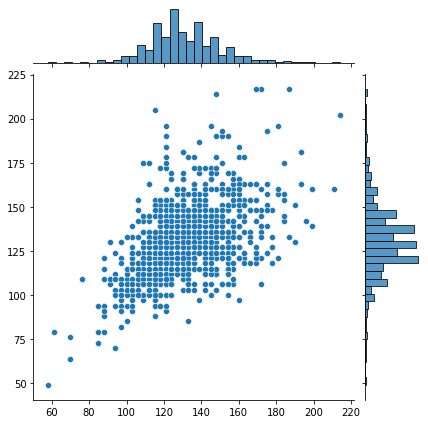

In [39]:
sns.jointplot(dim1,dim2)

# we see that the shapes are a bit scattered, some are of much higher dimensions
# we also see that, most image shapes are concentrated around 120 to 140 dimension

In [40]:
# resizing the image, by taking average of shape

print(np.mean(dim1))
print(np.mean(dim2))

130.92538461538462
130.75


In [41]:
# so, we can say that final image shape can be (130,130,3)

image_shape = (130,130,3)

# if it's a smaller image than 130x130, it will do padding automatically. If it's larger image than 130x130, it will crop that image

Data Pre-processing

* ImageDataGenerator - feed in the directory over your actual image files are and be able to perform manipulations on the images and then feed those new images to our model

* since 130x130x3 = 50700 datapoints is huge, we are not going to able to be able to feed everything at once. Instead, we will have to select batches of the image

In [43]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

In [45]:
# create a instance of ImageDataGenerator

image_gen = ImageDataGenerator(rotation_range=20, 
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

* our entire dataset is <30000 images, so we want to expand the amount of images to train without having to gather more data
* So, we take current images and perform some manipulations like rotation, flips, zooming, cropping and so on 

  * rotation_range - amount of rotation in degrees
  * width_shift_range - shift the actual width of image by some percentage
  * height_shift_range - shift the actual height of image by some percentage
  * shear_range - shear means cutting away some part of the image by some percentage
  * zoom_range - percentage of zoom in
  * fill_mode - to fill the missing data, a padding technique. 'nearest' takes nearest pixel values to pad

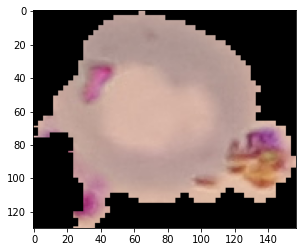

In [47]:
# before transformation

plt.imshow(imread(para_cell))

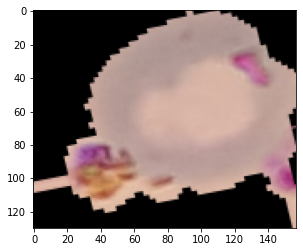

In [49]:
# after transformation 

plt.imshow(image_gen.random_transform(imread(para_cell)))   # Applies a random transformation to an image of the parameters mentioned

Using these, we can randomly transform these images, we can essentially augument the data. This is a way of artificially expanding our image data

In [50]:
train_path

'/tmp/cell_images/train/'

In [51]:
# flow from directory

image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [52]:
image_gen.flow_from_directory(test_path)

# classes are determined automatically, by storing them in proper directory structure

Found 2600 images belonging to 2 classes.


Creating the model

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

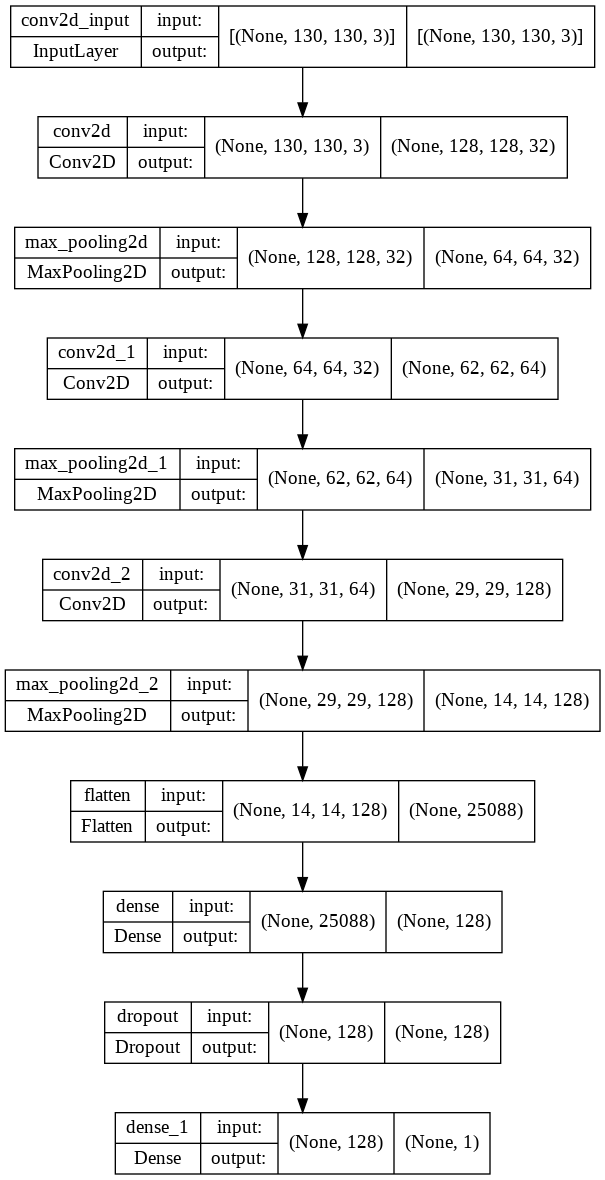

In [57]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)

In [59]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [60]:
train_image_gen = image_gen.flow_from_directory(train_path, 
                                                target_size=(130,130), 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test_path, 
                                                target_size=(130,130), 
                                                color_mode='rgb', 
                                                batch_size=16, 
                                                class_mode='binary',
                                                shuffle=False)    # we don't want to shuffle labels around actual values

Found 24958 images belonging to 2 classes.
Found 2600 images belonging to 2 classes.


In [61]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [64]:
result = model.fit(train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 153s 98ms/step - loss: 0.6879 - accuracy: 0.5649 - val_loss: 0.6785 - val_accuracy: 0.5719
Epoch 2/20
1560/1560 [==============================] - 153s 98ms/step - loss: 0.6752 - accuracy: 0.5813 - val_loss: 0.6678 - val_accuracy: 0.5808
Epoch 3/20
1560/1560 [==============================] - 151s 97ms/step - loss: 0.6758 - accuracy: 0.5920 - val_loss: 0.6772 - val_accuracy: 0.5815
Epoch 4/20
1560/1560 [==============================] - 152s 97ms/step - loss: 0.6749 - accuracy: 0.5912 - val_loss: 0.6898 - val_accuracy: 0.5635


In [65]:
model.save('malaria_classification_cnn.h5')